### **Installing and Importing packages**

In [ ]:
!pip install googletrans==4.0.0-rc1

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 49.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=dc3c073da34db48eefd9ca46116882892b2bd783f585e52d68c72004412c4cd7
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
!pip install vaderSentiment 

     |████████████████████████████████| 125 kB 20.4 MB/s 


In [ ]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

### **Scraper**

In [ ]:
news_articles = []
keyword = input('Enter the word:')
luces = "https://lucesdelsiglo.com/?s="+keyword
r = requests.get(luces)

soup = BeautifulSoup(r.content, 'html.parser')


Enter the word:cancun


In [ ]:
news = soup.find_all('div',{'class':'item-details'})

In [ ]:
link = []
for i in range(len(news)):
      url = news[i].find('a')['href']
      link.append(url)
      

In [ ]:
link

['https://lucesdelsiglo.com/2015/10/24/revista-luces-del-siglo-622/',
 'https://lucesdelsiglo.com/2015/10/19/revista-luces-del-siglo-621/',
 'https://lucesdelsiglo.com/2015/10/12/revista-luces-del-siglo-620/',
 'https://lucesdelsiglo.com/2015/10/03/revista-luces-del-siglo-619/',
 'https://lucesdelsiglo.com/2022/01/23/caen-ucranianos-con-huachicol-en-cancun-local/',
 'https://lucesdelsiglo.com/2022/01/21/nombran-en-cancun-ano-de-la-esperanza-multimedia/',
 'https://lucesdelsiglo.com/2022/01/21/nombran-en-cancun-ano-de-la-esperanza-local/',
 'https://lucesdelsiglo.com/2022/01/21/pelotero-de-cancun-firma-con-equipo-colegial-de-ee-uu-deportes/',
 'https://lucesdelsiglo.com/2022/01/21/abierto-mexicano-de-footgolf-sera-en-cancun-deportes/',
 'https://lucesdelsiglo.com/2022/01/20/cancun-tercer-destino-mas-popular-del-mundo-local/',
 'https://lucesdelsiglo.com/2022/01/20/suman-iniciativas-de-ambientalistas-en-cancun-multimedia/',
 'https://lucesdelsiglo.com/2022/01/20/suman-iniciativas-de-ambi

In [ ]:
del link[0:4]
link

['https://lucesdelsiglo.com/2022/01/23/caen-ucranianos-con-huachicol-en-cancun-local/',
 'https://lucesdelsiglo.com/2022/01/21/nombran-en-cancun-ano-de-la-esperanza-multimedia/',
 'https://lucesdelsiglo.com/2022/01/21/nombran-en-cancun-ano-de-la-esperanza-local/',
 'https://lucesdelsiglo.com/2022/01/21/pelotero-de-cancun-firma-con-equipo-colegial-de-ee-uu-deportes/',
 'https://lucesdelsiglo.com/2022/01/21/abierto-mexicano-de-footgolf-sera-en-cancun-deportes/',
 'https://lucesdelsiglo.com/2022/01/20/cancun-tercer-destino-mas-popular-del-mundo-local/',
 'https://lucesdelsiglo.com/2022/01/20/suman-iniciativas-de-ambientalistas-en-cancun-multimedia/',
 'https://lucesdelsiglo.com/2022/01/20/suman-iniciativas-de-ambientalistas-en-cancun-local/',
 'https://lucesdelsiglo.com/2022/01/18/sufre-cancun-fc-derrota-ante-dorados-deportes/',
 'https://lucesdelsiglo.com/2022/01/18/suena-cancun-fc-con-hilar-triunfos-deportes/']

In [ ]:
headlines = []
for i in range(len(news)):
     title = news[i].find('a').text
     headlines.append(title)

In [ ]:
headlines

['Revista “Luces del Siglo” #622',
 'Revista “Luces del Siglo” #621',
 'Revista “Luces del Siglo” #620',
 'Revista “Luces del Siglo” #619',
 'Caen ucranianos con huachicol en Cancún',
 'Nombran en Cancún ‘Año de la Esperanza’',
 'Nombran en Cancún ‘Año de la Esperanza’',
 'Pelotero de Cancún firma con equipo colegial de EE. UU.',
 'Abierto Mexicano de FootGolf será en Cancún',
 'Cancún, tercer destino más popular del mundo',
 'Suman iniciativas de ambientalistas en Cancún',
 'Suman iniciativas de ambientalistas en Cancún',
 'Sufre Cancún FC derrota ante Dorados',
 'Sueña Cancún FC con hilar triunfos']

In [ ]:
del headlines[0:4]
headlines

['Caen ucranianos con huachicol en Cancún',
 'Nombran en Cancún ‘Año de la Esperanza’',
 'Nombran en Cancún ‘Año de la Esperanza’',
 'Pelotero de Cancún firma con equipo colegial de EE. UU.',
 'Abierto Mexicano de FootGolf será en Cancún',
 'Cancún, tercer destino más popular del mundo',
 'Suman iniciativas de ambientalistas en Cancún',
 'Suman iniciativas de ambientalistas en Cancún',
 'Sufre Cancún FC derrota ante Dorados',
 'Sueña Cancún FC con hilar triunfos']

In [ ]:
ab = soup.find_all('div',{'class':'td-excerpt'})
ab

[<div class="td-excerpt">
                     Ocho personas, entre ellas dos originarias de Ucrania, fueron detenidas ayer por extraer combustible en una toma clandestina en Cancún.                </div>,
 <div class="td-excerpt">
                     El Cabildo de Benito Juárez designó el 2022 como el ‘Año de la Esperanza’, leyenda que aparecerá en todos los documentos oficiales.
                 </div>,
 <div class="td-excerpt">
                     El Cabildo de Benito Juárez designó el 2022 como el ‘Año de la Esperanza’, leyenda que aparecerá en todos los documentos oficiales.                </div>,
 <div class="td-excerpt">
                     El beisbolista cancunense Manuel Alejandro Martínez González, se encuentra en Iowa, Estados Unidos, donde realiza la pretemporada con los Blackhawks de Southeastern Community College, su nuevo equipo.                </div>,
 <div class="td-excerpt">
                     Durante 2021, el footgolf en Cancún se ha consolidado a nivel nacional

In [ ]:
abst=[]
for i in ab:
    x = i.text
    x = re.sub(r'^\s+|\s+$',' ',x)
    abst.append(x)

In [ ]:
abst

[' Ocho personas, entre ellas dos originarias de Ucrania, fueron detenidas ayer por extraer combustible en una toma clandestina en Cancún. ',
 ' El Cabildo de Benito Juárez designó el 2022 como el ‘Año de la Esperanza’, leyenda que aparecerá en todos los documentos oficiales. ',
 ' El Cabildo de Benito Juárez designó el 2022 como el ‘Año de la Esperanza’, leyenda que aparecerá en todos los documentos oficiales. ',
 ' El beisbolista cancunense Manuel Alejandro Martínez González, se encuentra en Iowa, Estados Unidos, donde realiza la pretemporada con los Blackhawks de Southeastern Community College, su nuevo equipo. ',
 ' Durante 2021, el footgolf en Cancún se ha consolidado a nivel nacional, debido a la infraestructura para desarrollar la actividad que hay en la ciudad. ',
 ' Junto al 3.er lugar dentro de los mejores destinos de 2022, Cancún también ganó como el mejor destino para los amantes del sol. ',
 ' El gobierno municipal de Benito Juárez abrió un canal de comunicación con grupos

In [ ]:
dt = soup.find_all('div',{'class':'td-module-meta-info'})
dt

[<div class="td-module-meta-info">
 <span class="td-post-date"><time class="entry-date updated td-module-date" datetime="2022-01-23T07:24:41-05:00">23 enero, 2022</time></span> </div>,
 <div class="td-module-meta-info">
 <span class="td-post-date"><time class="entry-date updated td-module-date" datetime="2022-01-21T17:33:00-05:00">21 enero, 2022</time></span> </div>,
 <div class="td-module-meta-info">
 <span class="td-post-date"><time class="entry-date updated td-module-date" datetime="2022-01-21T05:12:00-05:00">21 enero, 2022</time></span> </div>,
 <div class="td-module-meta-info">
 <span class="td-post-date"><time class="entry-date updated td-module-date" datetime="2022-01-21T04:38:00-05:00">21 enero, 2022</time></span> </div>,
 <div class="td-module-meta-info">
 <span class="td-post-date"><time class="entry-date updated td-module-date" datetime="2022-01-21T04:36:00-05:00">21 enero, 2022</time></span> </div>,
 <div class="td-module-meta-info">
 <span class="td-post-date"><time class=

In [ ]:
date = []
for i in dt:
   x = i.text
   x = re.sub(r'^\s+|\s+$',' ',x)
   date.append(x)

In [ ]:
date

[' 23 enero, 2022 ',
 ' 21 enero, 2022 ',
 ' 21 enero, 2022 ',
 ' 21 enero, 2022 ',
 ' 21 enero, 2022 ',
 ' 20 enero, 2022 ',
 ' 20 enero, 2022 ',
 ' 20 enero, 2022 ',
 ' 18 enero, 2022 ',
 ' 18 enero, 2022 ']

In [ ]:
 df = {'Date':date,'Headlines':headlines,'Abstract':abst,'Links':link}
 luces = pd.DataFrame(df)

In [ ]:
luces

,Date,Headlines,Abstract,Links
0,"23 enero, 2022",Caen ucranianos con huachicol en Cancún,"Ocho personas, entre ellas dos originarias de...",https://lucesdelsiglo.com/2022/01/23/caen-ucra...
1,"21 enero, 2022",Nombran en Cancún ‘Año de la Esperanza’,El Cabildo de Benito Juárez designó el 2022 c...,https://lucesdelsiglo.com/2022/01/21/nombran-e...
2,"21 enero, 2022",Nombran en Cancún ‘Año de la Esperanza’,El Cabildo de Benito Juárez designó el 2022 c...,https://lucesdelsiglo.com/2022/01/21/nombran-e...
3,"21 enero, 2022",Pelotero de Cancún firma con equipo colegial d...,El beisbolista cancunense Manuel Alejandro Ma...,https://lucesdelsiglo.com/2022/01/21/pelotero-...
4,"21 enero, 2022",Abierto Mexicano de FootGolf será en Cancún,"Durante 2021, el footgolf en Cancún se ha con...",https://lucesdelsiglo.com/2022/01/21/abierto-m...
5,"20 enero, 2022","Cancún, tercer destino más popular del mundo",Junto al 3.er lugar dentro de los mejores des...,https://lucesdelsiglo.com/2022/01/20/cancun-te...
6,"20 enero, 2022",Suman iniciativas de ambientalistas en Cancún,El gobierno municipal de Benito Juárez abrió ...,https://lucesdelsiglo.com/2022/01/20/suman-ini...
7,"20 enero, 2022",Suman iniciativas de ambientalistas en Cancún,El objetivo del canal es integrar a las asoci...,https://lucesdelsiglo.com/2022/01/20/suman-ini...
8,"18 enero, 2022",Sufre Cancún FC derrota ante Dorados,"Cancún FC cayó 1-2 ante Dorados, en la Jornad...",https://lucesdelsiglo.com/2022/01/18/sufre-can...
9,"18 enero, 2022",Sueña Cancún FC con hilar triunfos,El Cancún FC buscará ligar su segunda victori...,https://lucesdelsiglo.com/2022/01/18/suena-can...


### **Translator**

In [ ]:
translator = Translator()

In [ ]:
luces['Headlines'][0]

'Caen ucranianos con huachicol en Cancún'

In [ ]:
translation = translator.translate(luces['Headlines'][0])
translation.text

'They fall Ukrainians with Huachicol in Cancun'

In [ ]:
translated_news = []
for i in range(len(luces)):
    translated_news.append(translator.translate(luces['Headlines'][i]).text)
translated_news[0]    

'They fall Ukrainians with Huachicol in Cancun'

In [ ]:
translated_abs = []
for i in range(len(luces)):
  translated_abs.append(translator.translate(luces['Abstract'][i]).text)
translated_abs[0]  

'Eight people, including two originals in Ukraine, were detained yesterday to extract fuel into a clandestine taking in Cancun.'

In [ ]:
translated_dt = []
for i in range(len(luces)):
  translated_dt.append(translator.translate(luces['Date'][i]).text)
translated_dt[0]  

'January 23, 2022'

In [ ]:
luces['Translated_News'] = translated_news
luces['Translated_Abstract'] = translated_abs
luces['Translated_Date'] = translated_dt
luces['Sno'] = [i for i in range(1, len(translated_abs)+1)]

In [ ]:
luces

,Date,Headlines,Abstract,Links,Translated_News,Translated_Abstract,Translated_Date,Sno
0,"23 enero, 2022",Caen ucranianos con huachicol en Cancún,"Ocho personas, entre ellas dos originarias de...",https://lucesdelsiglo.com/2022/01/23/caen-ucra...,They fall Ukrainians with Huachicol in Cancun,"Eight people, including two originals in Ukrai...","January 23, 2022",1
1,"21 enero, 2022",Nombran en Cancún ‘Año de la Esperanza’,El Cabildo de Benito Juárez designó el 2022 c...,https://lucesdelsiglo.com/2022/01/21/nombran-e...,They name in Cancun 'Year of Hope',The Benito Juarez's Cabildo appointed 2022 as ...,"21 January, 2022",2
2,"21 enero, 2022",Nombran en Cancún ‘Año de la Esperanza’,El Cabildo de Benito Juárez designó el 2022 c...,https://lucesdelsiglo.com/2022/01/21/nombran-e...,They name in Cancun 'Year of Hope',The Benito Juarez's Cabildo appointed 2022 as ...,"21 January, 2022",3
3,"21 enero, 2022",Pelotero de Cancún firma con equipo colegial d...,El beisbolista cancunense Manuel Alejandro Ma...,https://lucesdelsiglo.com/2022/01/21/pelotero-...,Pelotecto de Cancun signs with college team fr...,The Beisbolist Cancunense Manuel Alejandro Mar...,"21 January, 2022",4
4,"21 enero, 2022",Abierto Mexicano de FootGolf será en Cancún,"Durante 2021, el footgolf en Cancún se ha con...",https://lucesdelsiglo.com/2022/01/21/abierto-m...,Open Mexican Footgolf will be in Cancun,"During 2021, Footgolf in Cancun has been conso...","21 January, 2022",5
5,"20 enero, 2022","Cancún, tercer destino más popular del mundo",Junto al 3.er lugar dentro de los mejores des...,https://lucesdelsiglo.com/2022/01/20/cancun-te...,"Cancun, third most popular destination in the ...",Next to the 3.or place within the best destina...,"January 20, 2022",6
6,"20 enero, 2022",Suman iniciativas de ambientalistas en Cancún,El gobierno municipal de Benito Juárez abrió ...,https://lucesdelsiglo.com/2022/01/20/suman-ini...,Add environmentalist initiatives in Cancun,The municipal government of Benito Juarez open...,"January 20, 2022",7
7,"20 enero, 2022",Suman iniciativas de ambientalistas en Cancún,El objetivo del canal es integrar a las asoci...,https://lucesdelsiglo.com/2022/01/20/suman-ini...,Add environmentalist initiatives in Cancun,The objective of the channel is to integrate e...,"January 20, 2022",8
8,"18 enero, 2022",Sufre Cancún FC derrota ante Dorados,"Cancún FC cayó 1-2 ante Dorados, en la Jornad...",https://lucesdelsiglo.com/2022/01/18/sufre-can...,Suffers Cancun FC defeat against golden,"Cancun FC fell 1-2 before golden, at day 3 of ...","January 18, 2022",9
9,"18 enero, 2022",Sueña Cancún FC con hilar triunfos,El Cancún FC buscará ligar su segunda victori...,https://lucesdelsiglo.com/2022/01/18/suena-can...,Dream Cancun FC with Hilar Triumphs,Cancun FC will seek to link its second consecu...,"January 18, 2022",10


In [ ]:
luces.to_csv('Luces.csv')

### **Sentiment Analysis**

In [ ]:
def sentiment_scores(sentence):
  sid_obj = SentimentIntensityAnalyzer()
 
  sentiment_dict = sid_obj.polarity_scores(sentence)
     
  #print("Overall sentiment dictionary is : ", sentiment_dict)
  #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
  #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
  #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

  #print("Sentence Overall Rated As", end = " ")

  # decide sentiment as positive, negative and neutral
  if sentiment_dict['compound'] >= 0.05 :
      #print("Positive")
      return "Positive"

  elif sentiment_dict['compound'] <= - 0.05 :
      #print("Negative")
      return "Negative"

  else :
      #print("Neutral")
      return "Neutral"

In [ ]:
final1 = []

for i in luces['Sno']:
    final1.append(sentiment_scores(luces['Translated_News'][i-1]))
    

In [ ]:
m1 = Counter(final1)
m1

Counter({'Negative': 1, 'Neutral': 5, 'Positive': 4})

<BarContainer object of 3 artists>

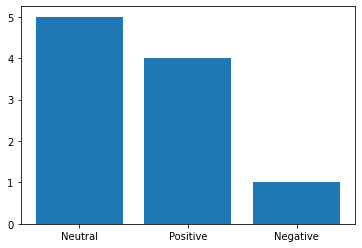

In [ ]:
keys1 = m1.keys()
values1 = m1.values()

plt.bar(keys1, values1)

In [ ]:
final2 = []

for i in luces['Sno']:
    final2.append(sentiment_scores(luces['Translated_Abstract'][i-1]))
    

In [ ]:
m2 = Counter(final2)
m2

Counter({'Negative': 1, 'Neutral': 5, 'Positive': 4})

<BarContainer object of 3 artists>

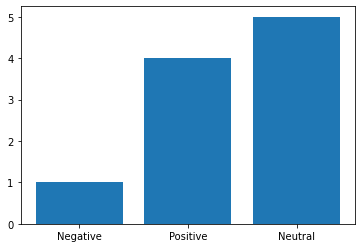

In [ ]:
keys2 = m2.keys()
values2 = m2.values()

plt.bar(keys2, values2)